### 구글 드라이브와 Colab 연동

```
from google.colab import drive 
drive.mount('/content/gdrive') 
cd /content/gdrive/My Drive/Colab Notebooks
```

### Pandas 10분 완성 Clone coding
https://dataitgirls2.github.io/10minutes2pandas/

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

- Object Creation (객체 생성)
- Viewing Data (데이터 확인하기)
- Selection (선택) 
- Missing Data (결측치) 
- Operation (연산)
- Merge (병합)
- Grouping (그룹화)
- Reshaping (변형)
- Time Series (시계열)
- Categoricals (범주화)
- Plotting (그래프)
- Getting Data In / Out (데이터 입 / 출력)
- Gotchas (잡았다!)

## 1.Object Creation (객체 생성)

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러옴

Series의 타입 : `<class ‘pandas.core.series.Series’>`

기본 자료형 : `float64`

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터 프레임을 만든다.

In [3]:
dates = pd.date_range('20220109',periods=6)
dates

DatetimeIndex(['2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2022-01-09,-0.407102,1.524779,-1.263411,-1.404267
2022-01-10,1.408678,-1.857188,1.689193,-0.402585
2022-01-11,-0.764562,1.358156,0.236021,0.067622
2022-01-12,0.231380,0.876655,0.208976,-1.955421
2022-01-13,-1.015177,-0.761557,-0.654458,-0.975631
2022-01-14,-1.475212,1.323135,0.174217,1.848393


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터 프레임을 만든다.

In [5]:
df2 = pd.DataFrame({'A' : 1. ,
                    'B' : pd.Timestamp('20220109'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4, dtype= 'int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'
                    })
df2

,A,B,C,D,E,F
0,1.0,2022-01-09,1.0,3,test,foo
1,1.0,2022-01-09,1.0,3,train,foo
2,1.0,2022-01-09,1.0,3,test,foo
3,1.0,2022-01-09,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입으로 구성됨.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하면, Tap 자동완성 기능이 자동으로 활성화 됨!

`# df2.<TAB>`

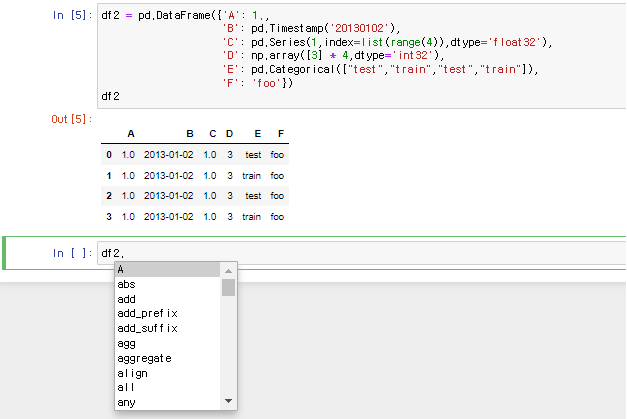

## 2.Viewing Data (데이터 확인하기)

데이터 프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때 사용

괄호() 안에 숫자가 들어갈 수도 있고, 안 들어갈 수도 있다. 

없으면 기본값 5

In [7]:
df.tail(3) # 끝에서 마지막 3줄 불러옴

,A,B,C,D
2022-01-12,0.300470,1.253164,1.247632,0.679639
2022-01-13,1.440990,0.261506,-0.291531,0.077105
2022-01-14,-2.010618,0.510977,-0.950131,0.098871


In [8]:
df.tail() # 끝에서 마지막 5줄 불러옴

,A,B,C,D
2022-01-10,-1.007854,-1.206534,0.880347,0.531255
2022-01-11,-0.672418,0.899741,-0.205300,0.919452
2022-01-12,0.300470,1.253164,1.247632,0.679639
2022-01-13,1.440990,0.261506,-0.291531,0.077105
2022-01-14,-2.010618,0.510977,-0.950131,0.098871


In [9]:
df.head() # 위에서 5줄

,A,B,C,D
2022-01-09,0.750144,-0.179696,0.807952,-0.546758
2022-01-10,-1.007854,-1.206534,0.880347,0.531255
2022-01-11,-0.672418,0.899741,-0.205300,0.919452
2022-01-12,0.300470,1.253164,1.247632,0.679639
2022-01-13,1.440990,0.261506,-0.291531,0.077105


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보

In [10]:
df.index

DatetimeIndex(['2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 0.75014446, -0.17969636,  0.80795241, -0.54675758],
       [-1.0078545 , -1.20653379,  0.88034666,  0.53125494],
       [-0.67241846,  0.89974137, -0.20530017,  0.91945205],
       [ 0.30047037,  1.25316406,  1.24763195,  0.67963881],
       [ 1.44098977,  0.26150582, -0.29153078,  0.07710492],
       [-2.01061784,  0.51097667, -0.95013097,  0.09887108]])

데이터의 대략적인 통계적 정보 요약

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.199881,0.256526,0.248162,0.293261
std,1.264930,0.872080,0.853787,0.526913
min,-2.010618,-1.206534,-0.950131,-0.546758
25%,-0.923995,-0.069396,-0.269973,0.082546
50%,-0.185974,0.386241,0.301326,0.315063
75%,0.637726,0.802550,0.862248,0.642543
max,1.440990,1.253164,1.247632,0.919452


데이터를 전치

In [14]:
df.T

,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
A,0.750144,-1.007854,-0.672418,0.300470,1.440990,-2.010618
B,-0.179696,-1.206534,0.899741,1.253164,0.261506,0.510977
C,0.807952,0.880347,-0.205300,1.247632,-0.291531,-0.950131
D,-0.546758,0.531255,0.919452,0.679639,0.077105,0.098871


In [15]:
df.transpose()

,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
A,0.750144,-1.007854,-0.672418,0.300470,1.440990,-2.010618
B,-0.179696,-1.206534,0.899741,1.253164,0.261506,0.510977
C,0.807952,0.880347,-0.205300,1.247632,-0.291531,-0.950131
D,-0.546758,0.531255,0.919452,0.679639,0.077105,0.098871


In [16]:
df = df.reset_index()
df

,index,A,B,C,D
0,2022-01-09,0.750144,-0.179696,0.807952,-0.546758
1,2022-01-10,-1.007854,-1.206534,0.880347,0.531255
2,2022-01-11,-0.672418,0.899741,-0.205300,0.919452
3,2022-01-12,0.300470,1.253164,1.247632,0.679639
4,2022-01-13,1.440990,0.261506,-0.291531,0.077105
5,2022-01-14,-2.010618,0.510977,-0.950131,0.098871


In [17]:
df.melt(id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

,index,variable,value
0,2022-01-09,A,0.750144
1,2022-01-10,A,-1.007854
2,2022-01-11,A,-0.672418
3,2022-01-12,A,0.300470
4,2022-01-13,A,1.440990
5,2022-01-14,A,-2.010618
6,2022-01-09,B,-0.179696
7,2022-01-10,B,-1.206534
8,2022-01-11,B,0.899741
9,2022-01-12,B,1.253164


축 별로 정렬

In [18]:
df.sort_index(axis=1, ascending=False)

,index,D,C,B,A
0,2022-01-09,-0.546758,0.807952,-0.179696,0.750144
1,2022-01-10,0.531255,0.880347,-1.206534,-1.007854
2,2022-01-11,0.919452,-0.205300,0.899741,-0.672418
3,2022-01-12,0.679639,1.247632,1.253164,0.300470
4,2022-01-13,0.077105,-0.291531,0.261506,1.440990
5,2022-01-14,0.098871,-0.950131,0.510977,-2.010618


값 별로 정렬

In [19]:
df.sort_values(by='B')

,index,A,B,C,D
1,2022-01-10,-1.007854,-1.206534,0.880347,0.531255
0,2022-01-09,0.750144,-0.179696,0.807952,-0.546758
4,2022-01-13,1.440990,0.261506,-0.291531,0.077105
5,2022-01-14,-2.010618,0.510977,-0.950131,0.098871
2,2022-01-11,-0.672418,0.899741,-0.205300,0.919452
3,2022-01-12,0.300470,1.253164,1.247632,0.679639


## 3.Selection (선택)

Pandas에 최적화된 데이터 접근 방법인 `.at`, `.iat`, `.loc` 및 `.iloc` 

### Getting(데이터 얻기)

df.A와 동일한 Series를 생성하는 단일 열 선택

In [20]:
df['A']

0    0.750144
1   -1.007854
2   -0.672418
3    0.300470
4    1.440990
5   -2.010618
Name: A, dtype: float64

행을 분할하는 `[]`를 통해 선택 한다.

In [21]:
df[0:3]

,index,A,B,C,D
0,2022-01-09,0.750144,-0.179696,0.807952,-0.546758
1,2022-01-10,-1.007854,-1.206534,0.880347,0.531255
2,2022-01-11,-0.672418,0.899741,-0.205300,0.919452


In [25]:
df['20220109':'20220111']

,A,B,C,D
2022-01-09,-0.407102,1.524779,-1.263411,-1.404267
2022-01-10,1.408678,-1.857188,1.689193,-0.402585
2022-01-11,-0.764562,1.358156,0.236021,0.067622


### Selection by Label (Label 을 통한 선택)

라벨을 사용하여 횡단면을 얻는다.

In [26]:
df.loc[dates[0]]

A   -0.407102
B    1.524779
C   -1.263411
D   -1.404267
Name: 2022-01-09 00:00:00, dtype: float64

라벨을 사용해 여러 축의 데이터를 얻는다.

In [27]:
df.loc[:,['A','B']]

,A,B
2022-01-09,-0.407102,1.524779
2022-01-10,1.408678,-1.857188
2022-01-11,-0.764562,1.358156
2022-01-12,0.231380,0.876655
2022-01-13,-1.015177,-0.761557
2022-01-14,-1.475212,1.323135


양쪽 종단점을 포함한 라벨 슬라이싱을 본다.

In [28]:
df.loc['20220109':'20220111',['A','C']]

,A,C
2022-01-09,-0.407102,-1.263411
2022-01-10,1.408678,1.689193
2022-01-11,-0.764562,0.236021


반환되는 객체의 차원을 줄인다.

In [29]:
df.loc['20220109',['A','B']]

A   -0.407102
B    1.524779
Name: 2022-01-09 00:00:00, dtype: float64

스칼라 값을 얻는다.

In [30]:
df.loc[dates[0],'A']

-0.40710183493740193

In [31]:
df.at[dates[0],'A']

-0.40710183493740193

### Selection by Position (위치로 선택하기)

넘겨받은 정수의 위치를 기준으로 선택

In [32]:
df.iloc[3]

A    0.231380
B    0.876655
C    0.208976
D   -1.955421
Name: 2022-01-12 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy/python과 유사하게 작동함

In [33]:
df.iloc[3:5,0:2]

,A,B
2022-01-12,0.231380,0.876655
2022-01-13,-1.015177,-0.761557


정수로 표기된 위치값의 리스트들을 통해, numpy/python의 스타일과 유사해 짐

In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2022-01-10,1.408678,1.689193
2022-01-11,-0.764562,0.236021
2022-01-13,-1.015177,-0.654458


명시적으로 행을 나누고자 하는 경우

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2022-01-10,1.408678,-1.857188,1.689193,-0.402585
2022-01-11,-0.764562,1.358156,0.236021,0.067622


명시적으로 열을 나누고자 하는 경우

In [36]:
df.iloc[:,1:3]

,B,C
2022-01-09,1.524779,-1.263411
2022-01-10,-1.857188,1.689193
2022-01-11,1.358156,0.236021
2022-01-12,0.876655,0.208976
2022-01-13,-0.761557,-0.654458
2022-01-14,1.323135,0.174217


명시적으로 값을 얻고자 하는 경우

In [37]:
df.iloc[1,1]

-1.8571877627290205

스칼라 값을 빠르게 얻는 방법 (위와 동일)

In [38]:
df.iat[1,1]

-1.8571877627290205

### Boolean Indexing

In [39]:
df[df.A>0]

,A,B,C,D
2022-01-10,1.408678,-1.857188,1.689193,-0.402585
2022-01-12,0.231380,0.876655,0.208976,-1.955421


Boolean 조건을 충족하는 데이터프레임에서 값을 선택

In [40]:
df[df>0]

,A,B,C,D
2022-01-09,NaN,1.524779,NaN,NaN
2022-01-10,1.408678,NaN,1.689193,NaN
2022-01-11,NaN,1.358156,0.236021,0.067622
2022-01-12,0.231380,0.876655,0.208976,NaN
2022-01-13,NaN,NaN,NaN,NaN
2022-01-14,NaN,1.323135,0.174217,1.848393


필터링을 위한 메소드 `isin()`을 사용

In [41]:
df2 = df.copy()
df2['E'] =['one','one','two','three','four','three']
df2

,A,B,C,D,E
2022-01-09,-0.407102,1.524779,-1.263411,-1.404267,one
2022-01-10,1.408678,-1.857188,1.689193,-0.402585,one
2022-01-11,-0.764562,1.358156,0.236021,0.067622,two
2022-01-12,0.231380,0.876655,0.208976,-1.955421,three
2022-01-13,-1.015177,-0.761557,-0.654458,-0.975631,four
2022-01-14,-1.475212,1.323135,0.174217,1.848393,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2022-01-11,-0.764562,1.358156,0.236021,0.067622,two
2022-01-13,-1.015177,-0.761557,-0.654458,-0.975631,four


### Setting(설정)

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됨

In [43]:
 s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20220109',periods=6))
 s1

2022-01-09    1
2022-01-10    2
2022-01-11    3
2022-01-12    4
2022-01-13    5
2022-01-14    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

라벨에 의해 값을 설정한다.

In [45]:
df.at[dates[0],'A']=0

위치에 의해 값을 설정한다.

In [46]:
df.iat[0,1] =0

Numpy 배열을 사용한 할당에 의해 값을 설정

In [47]:
df.loc[:,'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-1.263411,5,1
2022-01-10,1.408678,-1.857188,1.689193,5,2
2022-01-11,-0.764562,1.358156,0.236021,5,3
2022-01-12,0.231380,0.876655,0.208976,5,4
2022-01-13,-1.015177,-0.761557,-0.654458,5,5
2022-01-14,-1.475212,1.323135,0.174217,5,6


where 연산을 설정

In [49]:
df2 = df.copy()

In [50]:
df2[df2>0] = -df2
df2

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-1.263411,-5,-1
2022-01-10,-1.408678,-1.857188,-1.689193,-5,-2
2022-01-11,-0.764562,-1.358156,-0.236021,-5,-3
2022-01-12,-0.231380,-0.876655,-0.208976,-5,-4
2022-01-13,-1.015177,-0.761557,-0.654458,-5,-5
2022-01-14,-1.475212,-1.323135,-0.174217,-5,-6


## 4.Missing Data (결측치)

결측치를 표현하기 위해 주로 `np.nan` 값을 사용

 Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있다.
 
 Reindexing은 데이터의 복사본을 반환

In [51]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-1.263411,5,1,1.0
2022-01-10,1.408678,-1.857188,1.689193,5,2,1.0
2022-01-11,-0.764562,1.358156,0.236021,5,3,NaN
2022-01-12,0.231380,0.876655,0.208976,5,4,NaN


결측치를 가지고 있는 행들을 지운다.

In [52]:
df1.dropna(how='any')

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-1.263411,5,1,1.0
2022-01-10,1.408678,-1.857188,1.689193,5,2,1.0


결측치를 채워 넣는다.

In [53]:
df1.fillna(value=5)

,A,B,C,D,F,E
2022-01-09,0.000000,0.000000,-1.263411,5,1,1.0
2022-01-10,1.408678,-1.857188,1.689193,5,2,1.0
2022-01-11,-0.764562,1.358156,0.236021,5,3,5.0
2022-01-12,0.231380,0.876655,0.208976,5,4,5.0


nan인 값에 boolean을 통한 표식을 얻는다.

데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수

In [54]:
pd.isna(df1)

,A,B,C,D,F,E
2022-01-09,False,False,False,False,False,False
2022-01-10,False,False,False,False,False,False
2022-01-11,False,False,False,False,False,True
2022-01-12,False,False,False,False,False,True


## 5.Operation (연산)

### Stats(통계)

일반적으로 결측치를 제외한 후 연산. 기술 통계를 수행

In [55]:
df.mean()

A   -0.269149
B    0.156533
C    0.065089
D    5.000000
F    3.500000
dtype: float64

다른 축에서 동일한 연산 수행

In [56]:
df.mean(1)

2022-01-09    0.947318
2022-01-10    1.648137
2022-01-11    1.765923
2022-01-12    2.063402
2022-01-13    1.513761
2022-01-14    2.204428
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산. pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅

broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미

In [57]:
s = pd.Series([1,3,4,np.nan,6,8],index=dates).shift(2)
s

2022-01-09    NaN
2022-01-10    NaN
2022-01-11    1.0
2022-01-12    3.0
2022-01-13    4.0
2022-01-14    NaN
Freq: D, dtype: float64

In [58]:
df

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-1.263411,5,1
2022-01-10,1.408678,-1.857188,1.689193,5,2
2022-01-11,-0.764562,1.358156,0.236021,5,3
2022-01-12,0.231380,0.876655,0.208976,5,4
2022-01-13,-1.015177,-0.761557,-0.654458,5,5
2022-01-14,-1.475212,1.323135,0.174217,5,6


In [59]:
df.sub(s,axis='index')

,A,B,C,D,F
2022-01-09,NaN,NaN,NaN,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN,NaN
2022-01-11,-1.764562,0.358156,-0.763979,4.0,2.0
2022-01-12,-2.768620,-2.123345,-2.791024,2.0,1.0
2022-01-13,-5.015177,-4.761557,-4.654458,1.0,1.0
2022-01-14,NaN,NaN,NaN,NaN,NaN


### Apply(적용)

데이터에 함수를 적용

In [60]:
df.apply(np.cumsum)

,A,B,C,D,F
2022-01-09,0.000000,0.000000,-1.263411,5,1
2022-01-10,1.408678,-1.857188,0.425781,10,3
2022-01-11,0.644117,-0.499032,0.661802,15,6
2022-01-12,0.875496,0.377623,0.870778,20,10
2022-01-13,-0.139681,-0.383934,0.216320,25,15
2022-01-14,-1.614894,0.939201,0.390537,30,21


In [61]:
df.apply(lambda x: x.max() - x.min())

A    2.883891
B    3.215344
C    2.952604
D    0.000000
F    5.000000
dtype: float64

### Histogramming (히스토그래밍)

In [62]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    2
1    6
2    6
3    3
4    1
5    2
6    5
7    0
8    2
9    0
dtype: int64

In [63]:
s.value_counts()

2    3
6    2
0    2
5    1
3    1
1    1
dtype: int64

### String Methods (문자열 메소드)

Series는 문자열 처리 메소드 모음 (set)을 가지고 있다.

이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용한다.

In [64]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6.Merge (병합)

### Concat (연결)

결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공

`concat()`으로 pandas 객체를 연결합니다.

In [65]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.981837,0.739588,-0.460723,-0.940377
1,-1.001248,-0.367667,-0.328072,-0.616013
2,0.315321,1.428388,-3.372448,-0.348961
3,2.623988,0.862518,-0.598062,-1.734003
4,-1.175116,-0.525780,-1.542541,0.323035
5,1.643709,0.348238,1.859098,-0.466185
6,1.341302,-0.378123,-0.481629,-0.196933
7,1.305949,-1.729875,0.239641,1.416374
8,-2.106030,0.776354,-2.290127,0.907247
9,-0.097017,2.055834,-1.017134,1.253471


In [66]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.981837,0.739588,-0.460723,-0.940377
1,-1.001248,-0.367667,-0.328072,-0.616013
2,0.315321,1.428388,-3.372448,-0.348961
3,2.623988,0.862518,-0.598062,-1.734003
4,-1.175116,-0.525780,-1.542541,0.323035
5,1.643709,0.348238,1.859098,-0.466185
6,1.341302,-0.378123,-0.481629,-0.196933
7,1.305949,-1.729875,0.239641,1.416374
8,-2.106030,0.776354,-2.290127,0.907247
9,-0.097017,2.055834,-1.017134,1.253471


### Join (결합)

SQL 방싱으로 병합

In [67]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'lval':[4,5]})

In [68]:
left

,key,lval
0,foo,1
1,foo,2


In [69]:
right

,key,lval
0,foo,4
1,foo,5


In [70]:
pd.merge(left,right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [71]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'lval':[4,5]})

In [72]:
left

,key,lval
0,foo,1
1,bar,2


In [73]:
right

,key,lval
0,foo,4
1,bar,5


In [74]:
pd.merge(left,right,on='key')

,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


### Append (추가)

데이터프레임에 행을 추가

In [75]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.517966,-1.270092,0.105693,-0.584095
1,0.260666,-0.656701,0.599810,0.788556
2,0.540307,1.603885,0.499815,0.184639
3,-0.749788,-0.680283,-0.101997,-0.903439
4,0.365001,-1.617010,-0.056462,0.890878
5,1.904051,-1.573029,-1.167211,-0.721145
6,-0.357252,-0.013781,0.239907,-2.104090
7,0.645912,0.199358,-0.190873,-1.139386


In [76]:
s = df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,-0.517966,-1.270092,0.105693,-0.584095
1,0.260666,-0.656701,0.599810,0.788556
2,0.540307,1.603885,0.499815,0.184639
3,-0.749788,-0.680283,-0.101997,-0.903439
4,0.365001,-1.617010,-0.056462,0.890878
5,1.904051,-1.573029,-1.167211,-0.721145
6,-0.357252,-0.013781,0.239907,-2.104090
7,0.645912,0.199358,-0.190873,-1.139386
8,-0.749788,-0.680283,-0.101997,-0.903439


## 7.Grouping (그룹화)

- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
- 각 그룹에 독립적으로 함수를 적용 (applying)
- 결과물들을 하나의 데이터 구조로 결합 (combining)

In [77]:
df = pd.DataFrame(
    {
        'A' : ['foo','bar','foo','bar','foo','bar','foo','foo'],
        'B' : ['one','one','two','three','two','two','one','three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    }
)
df

,A,B,C,D
0,foo,one,-3.162994,-0.479133
1,bar,one,0.444592,-0.158854
2,foo,two,0.774542,0.403673
3,bar,three,-1.354193,1.951995
4,foo,two,-0.359885,-0.738558
5,bar,two,-1.107512,-0.588040
6,foo,one,0.617493,-1.028855
7,foo,three,1.966499,-0.242410


생성된 데이터프레임을 그룹화한 후 각 그룹에 `sum()` 함수를 적용

In [78]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.017113,1.205100
foo,-0.164345,-2.085284


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성된다.

여기에도 sum 함수를 적용할 수 있다.

In [79]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.444592 -0.158854
    three -1.354193  1.951995
    two   -1.107512 -0.588040
foo one   -2.545500 -1.507989
    three  1.966499 -0.242410
    two    0.414657 -0.334885

## 8.Reshaping (변형)

### Stack(스택)

In [80]:
tuples = list(zip(*[['bar','bar','baz','baz',
                     'foo','foo','qux','quz'],
                    ['one','two','one','two',
                     'one','two','one','two']]))

In [81]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index, columns=['A','B'])

In [82]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.735355 -0.920469
      two     0.366449  0.077579
baz   one    -1.270204 -0.801511
      two    -0.549955  1.611223

`stack()`메소드는 데이터프레임 열들의 계층을 압축한다.

In [83]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.735355
               B   -0.920469
       two     A    0.366449
               B    0.077579
baz    one     A   -1.270204
               B   -0.801511
       two     A   -0.549955
               B    1.611223
dtype: float64

`stack()`의 역 연산은 `unstack()` 기본적으로 마지막 계층을 unstack 한다.

In [84]:
stacked.unstack()

A         B
first second                    
bar   one     0.735355 -0.920469
      two     0.366449  0.077579
baz   one    -1.270204 -0.801511
      two    -0.549955  1.611223

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.735355  0.366449
      B -0.920469  0.077579
baz   A -1.270204 -0.549955
      B -0.801511  1.611223

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.735355 -1.270204
       B -0.920469 -0.801511
two    A  0.366449 -0.549955
       B  0.077579  1.611223

### Pivot Tables (피봇 테이블)

In [87]:
df = pd.DataFrame({'A' : ['one','one','two','three']*3,
                   'B' : ['A','B','C']*4,
                   'C' : ['foo','foo','foo','bar','bar','bar']*2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.611572,0.487440
1,one,B,foo,-0.207891,0.585842
2,two,C,foo,0.937104,0.832280
3,three,A,bar,1.390415,1.194787
4,one,B,bar,-0.290004,-0.256226
5,one,C,bar,-0.059620,-0.582308
6,two,A,foo,0.970874,-0.106978
7,three,B,foo,-0.170164,0.266740
8,one,C,foo,-0.208057,-0.132797
9,one,A,bar,-0.392605,-2.538167


In [88]:
pd.pivot_table(df, values='D', index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.392605 -0.611572
      B -0.290004 -0.207891
      C -0.059620 -0.208057
three A  1.390415       NaN
      B       NaN -0.170164
      C -0.002606       NaN
two   A       NaN  0.970874
      B -0.063885       NaN
      C       NaN  0.937104

## 9.Time Series (시계열)

Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공한다.

재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않음

In [89]:
rng = pd.date_range('1/1/2022',periods=100, freq='S')

In [90]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [91]:
ts.resample('5Min').sum()

2022-01-01    23793
Freq: 5T, dtype: int64

시간대를 표현

In [92]:
rng = pd.date_range('1/9/2022 00:00',periods=5, freq='D')

In [93]:
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2022-01-09    0.924886
2022-01-10    0.451638
2022-01-11   -1.021957
2022-01-12    0.892176
2022-01-13    1.371217
Freq: D, dtype: float64

In [94]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2022-01-09 00:00:00+00:00    0.924886
2022-01-10 00:00:00+00:00    0.451638
2022-01-11 00:00:00+00:00   -1.021957
2022-01-12 00:00:00+00:00    0.892176
2022-01-13 00:00:00+00:00    1.371217
Freq: D, dtype: float64

다른 시간대로 변환

In [95]:
ts_utc.tz_convert('US/Eastern')

2022-01-08 19:00:00-05:00    0.924886
2022-01-09 19:00:00-05:00    0.451638
2022-01-10 19:00:00-05:00   -1.021957
2022-01-11 19:00:00-05:00    0.892176
2022-01-12 19:00:00-05:00    1.371217
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환

In [96]:
rng = pd.date_range('1/9/2022',periods=5,freq='M')

In [97]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2022-01-31    1.136496
2022-02-28   -0.972880
2022-03-31    0.748541
2022-04-30    0.470753
2022-05-31   -0.250499
Freq: M, dtype: float64

In [98]:
ps = ts.to_period()
ps

2022-01    1.136496
2022-02   -0.972880
2022-03    0.748541
2022-04    0.470753
2022-05   -0.250499
Freq: M, dtype: float64

In [99]:
ps.to_timestamp()

2022-01-01    1.136496
2022-02-01   -0.972880
2022-03-01    0.748541
2022-04-01    0.470753
2022-05-01   -0.250499
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어 줌

11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말인 오전 9시로 변환

In [100]:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index =(prng.asfreq('M','e')+1).asfreq('H','s') + 9
ts.head()

1990-03-01 09:00   -1.045728
1990-06-01 09:00   -1.574452
1990-09-01 09:00    1.657574
1990-12-01 09:00    0.650373
1991-03-01 09:00   -0.952326
Freq: H, dtype: float64

## 10.Categoricals (범주화)

In [101]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가공하지 않은 성적을 범주형 데이터로 변환

In [102]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙이기

In [104]:
df["grade"].cat.categories = ["very good", "good","very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가함

In [105]:
df["grade"] = df["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])

In [106]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열

In [107]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시됨

In [108]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11.Plotting (그래프)

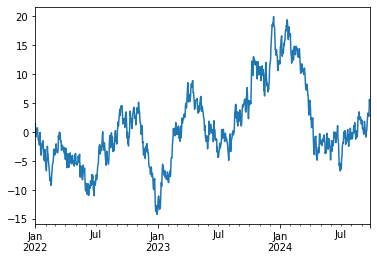

In [111]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2022',periods=1000))
ts = ts.cumsum()
ts.plot()

데이터프레임에서 `plot()` 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리

In [112]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

AttributeError: ignored

<Figure size 432x288 with 0 Axes>